In [1]:
from scipy.io import loadmat
import glob, os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

# 1. Data import

First, import electrophysiological data and save it in a dictionary (subject -> data).

## Electrophysiological data

In [2]:
DATA_BEHAV_DIR = "C:\\Users\\MariLiis\\Documents\\Ylikool\\Magister\\Thesis\\ofc-analysis\\data\\data_behav"
DATA_EPHYS_DIR = "C:\\Users\\MariLiis\\Documents\\Ylikool\\Magister\\Thesis\\ofc-analysis\\data\\data_ephys"
DATA_REGR_DIR = "C:\\Users\\MariLiis\\Documents\\Ylikool\\Magister\\Thesis\\ofc-analysis\\ofc_behav_data"

EPHYS_ATTRIBUTES = ["buttonpress_events_hg", "buttonpress_window_events_hg", "game_events_hg", "game_window_events_hg"]

In [3]:
ephys_data = {}

os.chdir(DATA_EPHYS_DIR)
s_nr = 1
for file in glob.glob("*.mat"):
    data = loadmat(file)
    print(file)
    ephys_data["s" + str(s_nr)] = data
    print(", ".join([str(data[EPHYS_ATTRIBUTES[i]].shape) for i in range(4)]))
    s_nr += 1

# shapes: nTrials x nTimePoints x nElectrodes
# buttonpress_events_hg, buttonpress_window_events_hg, game_events_hg, game_window_events_hg

s01_ofc_hg_events.mat
(180, 3001, 5), (180, 57, 5), (180, 3001, 5), (180, 57, 5)
s02_ofc_hg_events.mat
(188, 3001, 6), (188, 57, 6), (188, 3001, 6), (188, 57, 6)
s03_ofc_hg_events.mat
(194, 3001, 59), (194, 57, 59), (194, 3001, 59), (194, 57, 59)
s04_ofc_hg_events.mat
(108, 3001, 5), (108, 57, 5), (108, 3001, 5), (108, 57, 5)
s05_ofc_hg_events.mat
(179, 3001, 61), (179, 57, 61), (179, 3001, 61), (179, 57, 61)
s06_ofc_hg_events.mat
(187, 3001, 7), (187, 57, 7), (187, 3001, 7), (187, 57, 7)
s07_ofc_hg_events.mat
(181, 3001, 11), (181, 57, 11), (181, 3001, 11), (181, 57, 11)
s08_ofc_hg_events.mat
(200, 3001, 10), (200, 57, 10), (200, 3001, 10), (200, 57, 10)
s09_ofc_hg_events.mat
(200, 3001, 19), (200, 57, 19), (200, 3001, 19), (200, 57, 19)
s10_ofc_hg_events.mat
(136, 3001, 16), (136, 57, 16), (136, 3001, 16), (136, 57, 16)


There are 7 more electrodes in the dataset than claimed in the article:

In [4]:
5 + 6 + 59 + 5 + 61 + 7 + 11 + 10 + 19 + 16

199

Ephys data of the first subject:

In [5]:
ephys_data['s1']

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Oct  4 10:13:38 2017',
 '__version__': '1.0',
 '__globals__': [],
 'buttonpress_events_hg': array([[[-1.58727920e+00,  1.05128374e+01,  6.05310631e+00,
          -2.28112769e+00, -6.50844240e+00],
         [-1.50100076e+00,  1.05709600e+01,  5.94588137e+00,
          -2.44867826e+00, -6.61575365e+00],
         [-1.40762889e+00,  1.06269760e+01,  5.81524706e+00,
          -2.61478114e+00, -6.71759987e+00],
         ...,
         [-3.28059506e+00, -3.76724553e+00,  2.14711189e-01,
          -3.56857610e+00, -6.16227770e+00],
         [-3.51094031e+00, -3.79367042e+00,  2.70340770e-01,
          -3.84186172e+00, -6.34614944e+00],
         [-3.74763584e+00, -3.78652000e+00,  3.65292788e-01,
          -4.10444689e+00, -6.49010515e+00]],
 
        [[-7.61106491e+00,  3.44557953e+00,  1.27283061e+00,
          -4.36622763e+00, -8.05823231e+00],
         [-7.58190489e+00,  3.37234306e+00,  1.01458442e+00,
          -4.4942

## Behavioral data

In [6]:
behav_data = {}

os.chdir(DATA_BEHAV_DIR)
s_nr = 1
for file in glob.glob("*.csv"):
    print(file)
    if file != "gamble_choices.csv":
        df = pd.read_csv(file)
        behav_data["s" + str(s_nr)] = df
        print("s" + str(s_nr) + ": ", df.shape)
        s_nr += 1
    else:
        gamble_choices = pd.read_csv(file)
        
bad_trials_data = loadmat("bad_trials_OFC.mat")

gamble.data.s01.csv
s1:  (200, 9)
gamble.data.s02.csv
s2:  (200, 9)
gamble.data.s03.csv
s3:  (200, 9)
gamble.data.s04.csv
s4:  (200, 9)
gamble.data.s05.csv
s5:  (200, 9)
gamble.data.s06.csv
s6:  (200, 9)
gamble.data.s07.csv
s7:  (200, 9)
gamble.data.s08.csv
s8:  (200, 9)
gamble.data.s09.csv
s9:  (200, 9)
gamble.data.s10.csv
s10:  (138, 9)
gamble_choices.csv


Gamble data for all trials:

In [7]:
gamble_choices.head()

,Safe.Bet.Amount,Risky.Bet.Amount,Risky.bet.shown.number,Risky.bet.hidden.number,Risky.Side
0,10,30,1,5,Left
1,10,20,4,5,Left
2,10,25,7,8,Right
3,10,30,1,4,Left
4,10,25,6,1,Left


Behavioral data of the first subject:

In [8]:
behav_data['s1'].head()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.location,choice.class,outcome
0,1,6.191,6.957,8.003,8.019,8.535,Left,Gamble,Win
1,2,9.550,10.316,11.441,11.457,11.972,Left,Gamble,Win
2,3,12.988,13.753,14.832,14.847,15.363,Left,Safebet,WouldHaveWon
3,4,16.378,17.144,18.144,18.175,18.691,Left,Gamble,Win
4,5,19.707,20.472,21.519,21.550,22.066,Right,Safebet,WouldHaveLost


## Regressor data

In [9]:
regressor_data = {}
REGR_ATTRIBUTES = ['exputil', 'gamble_ind', 'loss_ind', 'regret', 'risk', 'rpe', 'win_ind', 'winprob', 'previous_exputil', 
                   'previous_gamble_ind', 'previous_loss_ind', 'previous_regret', 'previous_risk', 'previous_rpe', 
                   'previous_win_ind', 'previous_winprob']

os.chdir(DATA_REGR_DIR)
s_nr = 1
for file in glob.glob("*.mat"):
    data = loadmat(file)
    print(file)
    regressor_data['s' + str(s_nr)] = data
    s_nr += 1

s01_behav_globals.mat
s02_behav_globals.mat
s03_behav_globals.mat
s04_behav_globals.mat
s05_behav_globals.mat
s06_behav_globals.mat
s07_behav_globals.mat
s08_behav_globals.mat
s09_behav_globals.mat
s10_behav_globals.mat


In [10]:
regr_1 = regressor_data['s1']

In [11]:
print(len(regr_1['exputil']))
print(regr_1['exputil'].flatten())

180
[27.  12.  10.  27.  10.  27.  20.  10.  10.  21.  10.  12.  10.   8.
 12.  12.  20.  10.  10.  10.  10.   5.  10.  10.  18.   6.   7.5 10.
 10.  10.  10.   9.  12.  10.  10.  10.  10.   8.   7.5 20.  10.   4.5
 10.  12.   3.  18.  18.  14.  10.  10.  10.  10.   9.  12.5 12.  10.
 10.  20.  10.  18.  10.  18.  10.  18.  10.  10.  10.  10.   7.5 14.
 10.  12.  20.  12.  10.  21.  10.  10.  10.  10.  12.5 30.  17.5 21.
 21.  15.  18.  10.  10.  10.  10.   6.  15.  12.  10.  24.   4.5 10.
 12.5 15.  10.5 25.  18.  10.   2.5 12.  30.  10.  10.  10.  10.   6.
 21.   9.  20.  10.  10.   6.  22.5  9.  15.   4.  13.5 10.   9.  10.
 10.   6.  15.  10.  15.  18.  22.5 10.  20.  18.  10.  10.  10.  13.5
 10.  12.  12.  12.  10.  10.  20.   3.   5.  10.  10.  16.   7.5 10.
 10.  25.  21.  15.  10.  10.  13.5 12.  16.  20.  13.5 10.  25.  27.
 12.5 10.  10.  10.  27.   6.  22.5  6.   9.  10.  15.  10. ]


In [12]:
print(len(regr_1['gamble_ind']))
print(regr_1['gamble_ind'].flatten())

180
[1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0]


In [13]:
print(len(regr_1['loss_ind']))
print(regr_1['loss_ind'].flatten())

180
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]


In [14]:
print(len(regr_1['win_ind']))
print(regr_1['win_ind'].flatten())

180
[1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0]


In [15]:
print(len(regr_1['winprob']))
print(regr_1['winprob'].flatten())

180
[0.9 0.6 0.3 0.9 0.4 0.9 0.8 0.3 0.1 0.7 0.6 0.6 0.2 0.4 0.8 0.8 1.  0.
 0.8 0.5 0.2 0.2 0.3 0.  0.9 0.4 0.5 0.1 0.1 0.5 0.8 0.6 0.6 0.5 0.7 0.4
 0.3 0.4 0.5 1.  0.2 0.3 0.4 0.6 0.2 0.9 0.9 0.7 0.2 0.8 0.2 0.5 0.6 0.5
 0.8 0.4 0.2 0.8 0.  0.6 0.5 0.6 0.7 0.9 0.4 0.  0.1 0.2 0.5 0.7 0.  0.4
 0.8 0.6 0.7 0.7 0.5 0.4 0.5 0.5 0.5 1.  0.7 0.7 0.7 0.6 0.6 0.4 0.3 0.
 0.4 0.4 0.6 0.6 0.2 0.8 0.3 0.8 0.5 0.5 0.7 1.  0.6 0.4 0.1 0.6 1.  0.2
 0.5 0.  0.4 0.3 0.7 0.3 0.8 0.6 0.2 0.3 0.9 0.3 1.  0.2 0.9 0.3 0.6 0.1
 0.3 0.4 0.5 0.2 1.  0.9 0.9 0.  0.8 0.9 0.3 0.2 0.6 0.9 0.3 0.4 0.6 0.6
 0.1 0.2 0.8 0.2 0.2 0.5 0.3 0.8 0.3 0.2 0.5 1.  0.7 0.6 0.1 0.5 0.9 0.4
 0.8 0.8 0.9 0.7 1.  0.9 0.5 0.  0.2 0.5 0.9 0.4 0.9 0.4 0.6 0.5 1.  0. ]


In [16]:
print(len(regr_1['regret']))
print(regr_1['gamble_ind'].flatten())

180
[1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0]


In [17]:
print(len(regr_1['risk']))
print(regr_1['gamble_ind'].flatten())

180
[1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0]


In [18]:
print(len(regr_1['rpe']))
print(regr_1['gamble_ind'].flatten())

180
[1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0]


In [19]:
print(len(regr_1['previous_exputil']))
print(regr_1['previous_exputil'].flatten())

180
[ nan 27.  12.  10.  27.  10.  27.  20.  10.  10.  15.   0.  12.  10.
  8.  12.  12.  20.  10.  10.  10.  10.   5.  10.  10.  18.   6.   7.5
 10.  10.  10.  10.   9.  14.  10.  10.  10.  10.   8.   7.5 20.  10.
  4.5 10.  12.   3.  18.  18.  14.  10.  10.  10.  10.   9.  12.5 12.
 10.  10.  20.  10.  18.  10.  18.  10.  18.  10.  12.  10.  10.   7.5
 14.  10.  12.  20.  27.  10.  21.  10.  10.  10.  10.  12.5 30.  17.5
 21.  21.  15.  18.  10.  10.  10.  10.   6.  20.  12.  10.  24.   4.5
  0.  12.5 10.  10.5 25.  10.  10.   2.5 12.  30.  10.  10.  10.  10.
  6.  21.   9.  20.  10.  10.   6.  22.5  9.  15.   4.  13.5 10.   9.
 10.  10.   6.  15.  10.  15.  18.  22.5 10.  20.  18.  10.  10.   0.
 13.5 10.  12.  12.  12.  10.  10.  20.   3.   5.  10.  10.  16.   7.5
 10.  10.  25.  21.  15.  10.  10.  10.  12.  16.  20.  13.5 10.  25.
 27.  12.5 10.  10.  10.  27.   6.  22.5  6.   9.  10.  15. ]


In [20]:
print(len(regr_1['previous_gamble_ind']))
print(regr_1['previous_gamble_ind'].flatten())

180
[nan  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.
  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.
  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.
  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.
  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.
  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.
  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.
  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.
  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.
  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.]


In [21]:
print(len(regr_1['previous_loss_ind']))
print(regr_1['previous_loss_ind'].flatten())

180
[nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.]


In [22]:
print(len(regr_1['previous_regret']))
print(regr_1['previous_regret'].flatten())

180
[ nan   0.   0. -15.   0.   0.   0.   0.   0.   0.   0.   0. -10.   0.
 -10.   0.   0.   0.   0. -20. -10.  -5. -10. -15.   0. -10. -10.   0.
   0.   0. -10.   0.   0.   0.   0. -10. -10.   0.   0.   0.   0.   0.
 -10.   0.   0. -10.   0.   0.   0.   0. -20.   0.   0.   0. -10. -10.
   0.   0.   0.   0.   0.   0.   0. -20. -10.   0.   0.   0.   0. -10.
   0.   0.   0.   0.   0.   0.   0.   0. -10.   0. -10.   0.   0. -10.
 -10. -10.   0. -10.  -5.   0.   0.   0. -10.   0.   0.   0.   0.   0.
   0. -10.   0.   0.   0.   0.   0. -10.   0.   0.   0.   0.   0.   0.
 -10.   0. -10.   0. -20. -10. -10.   0. -10.   0. -10.   0. -20.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -20. -10.   0.
   0.   0.   0.   0. -10. -20.   0.   0. -10. -10. -10.   0.   0. -10.
  -5. -10.   0.   0.   0.   0. -10.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. -10.   0. -10.   0.   0.   0.   0.   0.]


In [23]:
print(len(regr_1['previous_risk']))
print(regr_1['previous_risk'].flatten())

180
[ nan 0.09 0.24 0.21 0.09 0.24 0.09 0.16 0.21 0.09 0.24 0.16 0.24 0.16
 0.24 0.16 0.16 0.   0.   0.16 0.25 0.16 0.16 0.21 0.   0.09 0.24 0.25
 0.09 0.09 0.25 0.21 0.24 0.21 0.25 0.21 0.24 0.21 0.24 0.25 0.   0.16
 0.21 0.24 0.24 0.16 0.09 0.09 0.21 0.16 0.16 0.16 0.25 0.24 0.25 0.16
 0.24 0.16 0.16 0.   0.24 0.25 0.24 0.21 0.09 0.24 0.24 0.09 0.16 0.25
 0.21 0.   0.24 0.16 0.09 0.21 0.21 0.25 0.24 0.25 0.25 0.25 0.   0.21
 0.21 0.21 0.24 0.24 0.24 0.21 0.   0.24 0.24 0.   0.24 0.16 0.16 0.21
 0.21 0.25 0.24 0.21 0.   0.09 0.24 0.09 0.24 0.   0.16 0.25 0.   0.24
 0.21 0.21 0.21 0.16 0.24 0.16 0.21 0.09 0.21 0.   0.16 0.09 0.21 0.24
 0.09 0.21 0.24 0.25 0.16 0.   0.09 0.09 0.   0.16 0.09 0.21 0.16 0.24
 0.09 0.21 0.24 0.24 0.24 0.09 0.16 0.16 0.16 0.16 0.25 0.21 0.16 0.21
 0.25 0.25 0.   0.21 0.24 0.09 0.25 0.09 0.24 0.16 0.16 0.09 0.21 0.
 0.09 0.25 0.   0.16 0.25 0.09 0.24 0.09 0.24 0.24 0.25 0.  ]


In [24]:
print(len(regr_1['previous_rpe']))
print(regr_1['previous_rpe'].flatten())

180
[  nan   3.    8.    0.    3.    0.    3.    5.    0.    0.   10.    0.
 -12.    0.   -8.    3.    3.    0.    0.    0.  -10.    0.   -5.    0.
   0.  -18.   -6.    7.5   0.    0.  -10.    0.    6.    6.    0.    0.
 -10.    0.   12.    7.5   0.    0.   -4.5   0.    8.   -3.    2.    2.
   6.    0.    0.    0.   10.    6.  -12.5 -12.    0.    0.    5.    0.
  12.   10.   12.    0.  -18.    0.   18.    0.    0.   -7.5   6.    0.
  18.    5.    3.    0.    9.   10.    0.    0.  -10.   12.5   0.  -17.5
 -21.  -21.   10.  -18.    0.    0.    0.   15.   -6.    0.    8.    0.
   6.   10.5   0.  -12.5   0.    4.5   0.    0.    0.   -2.5   8.    0.
   0.    0.    0.   15.   -6.    9.   -9.    5.    0.    0.   -6.    2.5
  -9.    0.   -4.    1.5   0.    6.    0.    0.    9.   15.    0.    0.
   2.    2.5   0.    5.    2.    0.    0.    0.    1.5   0.   18.    8.
 -12.    0.    0.    5.   -3.   -5.  -10.    0.    4.   -7.5   0.    0.
   0.    9.   10.    0.    0.    0.   18.    4.    5.    1

In [25]:
print(len(regr_1['previous_win_ind']))
print(regr_1['previous_win_ind'].flatten())

180
[nan  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.
  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.
  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.
  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.
  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.
  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.  1.  1.  1.  1.]


In [26]:
print(len(regr_1['previous_winprob']))
print(regr_1['previous_winprob'].flatten())

180
[nan 0.9 0.6 0.3 0.9 0.4 0.9 0.8 0.3 0.1 0.6 0.2 0.6 0.2 0.4 0.8 0.8 1.
 0.  0.8 0.5 0.2 0.2 0.3 0.  0.9 0.4 0.5 0.1 0.1 0.5 0.3 0.6 0.7 0.5 0.7
 0.4 0.3 0.4 0.5 1.  0.2 0.3 0.4 0.6 0.2 0.9 0.9 0.7 0.2 0.8 0.2 0.5 0.6
 0.5 0.8 0.4 0.2 0.8 0.  0.6 0.5 0.6 0.7 0.9 0.4 0.4 0.1 0.2 0.5 0.7 0.
 0.4 0.8 0.9 0.7 0.7 0.5 0.4 0.5 0.5 0.5 1.  0.7 0.7 0.7 0.6 0.6 0.4 0.3
 0.  0.4 0.4 1.  0.6 0.2 0.8 0.3 0.7 0.5 0.4 0.7 1.  0.1 0.4 0.1 0.6 1.
 0.2 0.5 0.  0.4 0.3 0.7 0.3 0.8 0.6 0.2 0.3 0.9 0.3 1.  0.2 0.9 0.3 0.6
 0.1 0.3 0.4 0.5 0.2 1.  0.9 0.9 0.  0.8 0.9 0.3 0.2 0.4 0.9 0.3 0.4 0.6
 0.6 0.1 0.2 0.8 0.2 0.2 0.5 0.3 0.8 0.3 0.5 0.5 1.  0.7 0.6 0.1 0.5 0.1
 0.4 0.8 0.8 0.9 0.7 1.  0.9 0.5 0.  0.2 0.5 0.9 0.4 0.9 0.4 0.6 0.5 1. ]


# 2. Preparing & verifying data

## Timeouts (ephys and behav)

Let's look at the number of timeout trials in each subject.

In [27]:
behav_data['s1']['choice.class'].value_counts() # 180 / 196 -- nr of ephys trials / nr of non-timeout trials in behav data

Gamble     124
Safebet     72
Timeout      4
Name: choice.class, dtype: int64

In [28]:
behav_data['s2']['choice.class'].value_counts() # 188 / 198  

Gamble     111
Safebet     87
Timeout      2
Name: choice.class, dtype: int64

In [29]:
behav_data['s3']['choice.class'].value_counts() # 194 / 200

Safebet    104
Gamble      96
Name: choice.class, dtype: int64

In [30]:
behav_data['s4']['choice.class'].value_counts() # 108 / 111

Timeout    89
Safebet    59
Gamble     52
Name: choice.class, dtype: int64

In [31]:
behav_data['s5']['choice.class'].value_counts() # 179 / 196

Gamble     144
Safebet     52
Timeout      4
Name: choice.class, dtype: int64

In [32]:
behav_data['s6']['choice.class'].value_counts() # 187 / 200

Gamble     116
Safebet     84
Name: choice.class, dtype: int64

In [33]:
behav_data['s7']['choice.class'].value_counts() # 181 / 200

Safebet    103
Gamble      97
Name: choice.class, dtype: int64

In [34]:
behav_data['s8']['choice.class'].value_counts() # 200 / 200

Safebet    100
Gamble     100
Name: choice.class, dtype: int64

In [35]:
behav_data['s9']['choice.class'].value_counts() # 200 / 200

Safebet    105
Gamble      95
Name: choice.class, dtype: int64

In [36]:
behav_data['s10']['choice.class'].value_counts() # 136 / 138

Gamble     79
Safebet    59
Name: choice.class, dtype: int64

We can see that the number of good trials in the behavioral and ephys datasets don't match up. 

### bad_trials_OFC.mat

The bad_trials file contains the indices of trials for every subject that were discarded due to aberrant activity.

In [37]:
print(bad_trials_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep 27 15:27:57 2018', '__version__': '1.0', '__globals__': [], 'bad_trials_OFC': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [38]:
bad_trials_data = bad_trials_data['bad_trials_OFC']
bad_trials_data.shape

(10, 200)

Print out the counts of 0s and 1s for every array and save the indices of bad trials in a dictionary (subject -> list of indices)

In [39]:
bad_trial_idx = {}
for i in range(10):
    count_0 = list(bad_trials_data[i]).count(0)
    count_1 = list(bad_trials_data[i]).count(1)
    print(count_0, ",", count_1)
    bad_trial_idx['s' + str(i + 1)] = [j for j in range(200) if bad_trials_data[i][j] == 1]

183 , 17
190 , 10
194 , 6
194 , 6
182 , 18
187 , 13
181 , 19
200 , 0
200 , 0
198 , 2


### Combining

The number of good trials doesn't match up with the number of ephys trials for several subjects. We need to combine these bad trials with timeout trials.

In [40]:
combined_idx = {}

for i in range(10):
    print("Subject", i + 1)
    idx_1 = bad_trial_idx['s' + str(i + 1)]
    print("Bad trials:", idx_1)
    behav = behav_data['s' + str(i + 1)]
    idx_2 = list(behav[behav.outcome == 'Timeout'].index)
    print("Timeout trials:", idx_2)
    idx_all = sorted(list(set(idx_1 + idx_2)))
    print("Combined:", idx_all)
    print("len:", len(idx_all))
    combined_idx['s' + str(i + 1)] = idx_all
    print("200 - n_ephys_trials =", 200 - len(ephys_data['s' + str(i + 1)]['game_events_hg']))
    print()

Subject 1
Bad trials: [10, 11, 12, 13, 36, 39, 73, 74, 83, 84, 104, 113, 114, 115, 119, 172, 180]
Timeout trials: [11, 15, 110, 156]
Combined: [10, 11, 12, 13, 15, 36, 39, 73, 74, 83, 84, 104, 110, 113, 114, 115, 119, 156, 172, 180]
len: 20
200 - n_ephys_trials = 20

Subject 2
Bad trials: [0, 5, 6, 11, 95, 103, 104, 105, 195, 196]
Timeout trials: [65, 81]
Combined: [0, 5, 6, 11, 65, 81, 95, 103, 104, 105, 195, 196]
len: 12
200 - n_ephys_trials = 12

Subject 3
Bad trials: [15, 19, 50, 151, 198, 199]
Timeout trials: []
Combined: [15, 19, 50, 151, 198, 199]
len: 6
200 - n_ephys_trials = 6

Subject 4
Bad trials: [22, 23, 24, 25, 26, 27]
Timeout trials: [0, 1, 2, 3, 6, 11, 13, 17, 20, 22, 24, 26, 28, 29, 33, 34, 35, 36, 37, 38, 43, 45, 46, 53, 57, 58, 60, 61, 62, 63, 65, 67, 68, 69, 73, 74, 79, 81, 87, 93, 96, 97, 98, 99, 104, 105, 106, 107, 111, 112, 114, 117, 119, 121, 126, 127, 128, 129, 130, 136, 137, 148, 149, 151, 152, 154, 156, 157, 160, 162, 164, 165, 168, 169, 172, 173, 174, 175, 1

The number of ephys trials matches for every subject. We also need to mark the 'bad' trials as such in the behavioral data.

In [41]:
for s in behav_data.keys():
    behav_data[s]['trial.included'] = 1
    behav_data[s]['trial.included'].iloc[combined_idx[s]] = 0
    print(s)
    print(behav_data[s]['trial.included'].value_counts())
    print("Numbers match:", behav_data[s]['trial.included'].value_counts()[1] == ephys_data[s]['buttonpress_events_hg'].shape[0]) 
    # we can check only for buttonpress_events_hg because the number of trials was the same for every array of ephys data

s1
1    180
0     20
Name: trial.included, dtype: int64
Numbers match: True
s2

C:\Users\MariLiis\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



1    188
0     12
Name: trial.included, dtype: int64
Numbers match: True
s3
1    194
0      6
Name: trial.included, dtype: int64
Numbers match: True
s4
1    108
0     92
Name: trial.included, dtype: int64
Numbers match: True
s5
1    179
0     21
Name: trial.included, dtype: int64
Numbers match: True
s6
1    187
0     13
Name: trial.included, dtype: int64
Numbers match: True
s7
1    181
0     19
Name: trial.included, dtype: int64
Numbers match: True
s8
1    200
Name: trial.included, dtype: int64
Numbers match: True
s9
1    200
Name: trial.included, dtype: int64
Numbers match: True
s10
1    136
0      2
Name: trial.included, dtype: int64
Numbers match: True


In [42]:
behav_data['s1'][behav_data['s1'].outcome == 'Timeout']

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.location,choice.class,outcome,trial.included
11,12,44.832,45.597,NaN,47.613,48.128,Timeout,Timeout,Timeout,0
15,16,60.597,61.363,NaN,63.378,63.894,Timeout,Timeout,Timeout,0
110,111,402.800,403.566,NaN,405.582,406.097,Timeout,Timeout,Timeout,0
156,157,562.253,563.019,NaN,565.035,565.550,Timeout,Timeout,Timeout,0


In [43]:
behav_data['s1'].iloc[combined_idx['s1']]

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.location,choice.class,outcome,trial.included
10,11,41.332,42.097,43.269,43.300,43.816,Left,Gamble,Win,0
11,12,44.832,45.597,NaN,47.613,48.128,Timeout,Timeout,Timeout,0
12,13,49.144,49.910,51.707,51.722,52.238,Right,Safebet,WouldHaveLost,0
13,14,53.253,54.019,55.347,55.363,55.878,Right,Gamble,Win,0
15,16,60.597,61.363,NaN,63.378,63.894,Timeout,Timeout,Timeout,0
36,37,137.488,138.253,139.488,139.503,140.019,Right,Safebet,WouldHaveLost,0
39,40,148.207,148.972,150.160,150.175,150.707,Right,Gamble,Win,0
73,74,271.082,271.847,273.378,273.394,273.925,Left,Safebet,WouldHaveWon,0
74,75,274.941,275.707,276.910,276.925,277.441,Left,Gamble,Win,0
83,84,307.644,308.410,309.832,309.847,310.363,Right,Gamble,Win,0


We have successfully managed to denote the discarded trials in the behavioral data.

## Regressor data indices

Finally, we need to verify whether the win, gamble and loss indices of the regressor data match to those of the behavior data. gamble_ind, win_ind and loss_ind from the regressor data denote the indices of the trials where the subject gambled, won or lost.

In [44]:
def check_gamble_ind(b_data, gamble_ind, n_trials):
    if n_trials != len(gamble_ind):
        print("Lengths do not match, %d != %d" % (n_trials, len(gamble_ind)))
        return
    
    # Take only the included trials, reset the indices to 0, ..., n_trials - 1
    b_data_included = b_data[b_data['trial.included'] == 1].reset_index(drop=True)
    # Get the indices of the gamble trials 
    b_data_included_gamble_idx = sorted(b_data_included[b_data_included.outcome.isin(['WouldHaveWon', 'WouldHaveLost'])].index)
    # For every index: 0 -- is a gamble trial, 1 -- is not
    x = [(0 if i in b_data_included_gamble_idx else 1) for i in range(n_trials)]
    # Check if the result matches with the gamble_ind from the regressor data
    print("Gamble trials match:", not False in list(x == gamble_ind))

def check_win_ind(b_data, win_ind, n_trials):
    if n_trials != len(win_ind):
        print("Lengths do not match, %d != %d" % (n_trials, len(win_ind)))
        return
    
    b_data_included = b_data[b_data['trial.included'] == 1].reset_index(drop=True)
    b_data_included_win_idx = sorted(b_data_included[b_data_included.outcome == 'Win'].index)
    # For every index: 1 -- is a win trial, 0 -- is not
    x = [(1 if i in b_data_included_win_idx else 0) for i in range(n_trials)]
    print("Win trials match:", not False in list(x == win_ind))

def check_loss_ind(b_data, loss_ind, n_trials):
    if n_trials != len(loss_ind):
        print("Lengths do not match, %d != %d" % (n_trials, len(loss_ind)))
        return
    
    b_data_included = b_data[b_data['trial.included'] == 1].reset_index(drop=True)
    b_data_included_loss_idx = sorted(b_data_included[b_data_included.outcome == 'Loss'].index)
    # For every index: 1 -- is a loss trial, 0 -- is not
    x = [(1 if i in b_data_included_loss_idx else 0) for i in range(n_trials)]
    print("Loss trials match:", not False in list(x == loss_ind))

In [45]:
check_gamble_ind(behav_data['s1'], regr_1['gamble_ind'].flatten(), len(ephys_data['s1']['game_events_hg']))

Gamble trials match: True


In [46]:
check_win_ind(behav_data['s1'], regr_1['win_ind'].flatten(), len(ephys_data['s1']['game_events_hg']))

Win trials match: True


In [47]:
check_loss_ind(behav_data['s1'], regr_1['loss_ind'].flatten(), len(ephys_data['s1']['game_events_hg']))

Loss trials match: True


In [48]:
def check_trial_indices():
    for i in range(1, 11):
        s = 's' + str(i)
        print(s)
        b_data = behav_data[s]
        r_data = regressor_data[s]
        n_trials = len(ephys_data[s]['game_events_hg'])
        check_gamble_ind(b_data, r_data['gamble_ind'].flatten(), n_trials)
        check_win_ind(b_data, r_data['win_ind'].flatten(), n_trials)        
        check_loss_ind(b_data, r_data['loss_ind'].flatten(), n_trials)        

check_trial_indices()

s1
Gamble trials match: True
Win trials match: True
Loss trials match: True
s2
Gamble trials match: True
Win trials match: True
Loss trials match: True
s3
Gamble trials match: True
Win trials match: True
Loss trials match: True
s4
Gamble trials match: True
Win trials match: True
Loss trials match: True
s5
Gamble trials match: True
Win trials match: True
Loss trials match: True
s6
Gamble trials match: True
Win trials match: True
Loss trials match: True
s7
Gamble trials match: True
Win trials match: True
Loss trials match: True
s8
Gamble trials match: True
Win trials match: True
Loss trials match: True
s9
Gamble trials match: True
Win trials match: True
Loss trials match: True
s10
Gamble trials match: True
Win trials match: True
Loss trials match: True


We can see that for all subjects, all indices match. This means that we can proceed with the analysis, as the data has been  verified.

# 3. First analysis 

The first goal is to replicate some images from the article, namely 2A and 2B.

## 2A

To replicate 2A, we need data from one electrode. For starters, we will use the first subject's first electrode.

In [49]:
# Extracts the data for the nth electrode (n = 1, 2, ...)
# The resulting array should be in the shape (n_trials, 3001)
def extract_electrode_data(data, n_electrode):
    new_data = []
    for trial in data:
        trial_data = []
        for timepoint in trial:
            trial_data.append(timepoint[n_electrode - 1])
        new_data.append(trial_data)
    return np.array(new_data)

In [50]:
# First patient
data_1_behav = behav_data['s1']
# First patient, first electrode
data_1_ephys = extract_electrode_data(ephys_data['s1']['buttonpress_events_hg'], 0)
data_1_ephys.shape

(180, 3001)

Heatmap of all trials:

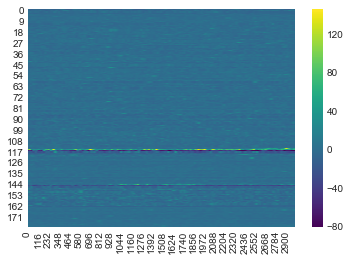

In [51]:
sns.heatmap(data_1_ephys, cmap="viridis")

We actually want to visualize the win and other trials separately.

First, the win trials.

(78, 3001)


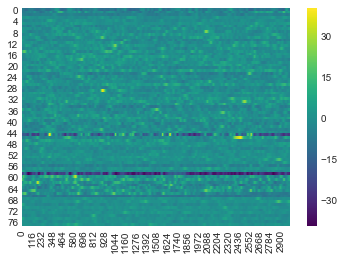

In [52]:
# We need to extract data that was actually used and reset the index so they correspond to the ephys dataset's indices
data_1_behav_inc = data_1_behav[data_1_behav['trial.included'] == 1].reset_index(drop=True) 
win_trials_idx = data_1_behav_inc[data_1_behav_inc['outcome'] == 'Win'].index

win_data = data_1_ephys[win_trials_idx, :]
print(win_data.shape)
sns.heatmap(win_data, cmap="viridis")

Next, all the other trials.

(102, 3001)


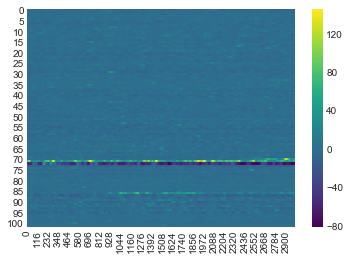

In [53]:
other_trials_idx = data_1_behav_inc[data_1_behav_inc['outcome'].isin(['Loss', 'WouldHaveWon', 'WouldHaveLost'])].index
other_data = data_1_ephys[other_trials_idx, :]
print(other_data.shape)
sns.heatmap(other_data, cmap="viridis")

However, if we look at the description of image 2A, we notice that the visualized trials are time-locked to gamble outcome reveal. That is, it is a time interval [-0.5, 1.5] seconds around the gamble outcome.

Therefore, the ephys trials we have need to be rearranged.

In [54]:
data_1_behav_inc.head()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.location,choice.class,outcome,trial.included
0,1,6.191,6.957,8.003,8.019,8.535,Left,Gamble,Win,1
1,2,9.550,10.316,11.441,11.457,11.972,Left,Gamble,Win,1
2,3,12.988,13.753,14.832,14.847,15.363,Left,Safebet,WouldHaveWon,1
3,4,16.378,17.144,18.144,18.175,18.691,Left,Gamble,Win,1
4,5,19.707,20.472,21.519,21.550,22.066,Right,Safebet,WouldHaveLost,1


In [55]:
data_1_behav[data_1_behav['trial.included'] == 0].index

Int64Index([ 10,  11,  12,  13,  15,  36,  39,  73,  74,  83,  84, 104, 110,
            113, 114, 115, 119, 156, 172, 180],
           dtype='int64')

However, we can see that the trials that are not included in the dataset are not sequential, which means that we do not have the necessary data to rearrange the time series data in this way for subject 1.

Let's conduct this analysis for electrode 10 of subject 9 instead, which has all 200 trials included in the dataset. 

In [56]:
data_9_behav = behav_data['s9']
data_9_ephys = extract_electrode_data(ephys_data['s9']['buttonpress_events_hg'], 10)
data_9_ephys.shape

(200, 3001)

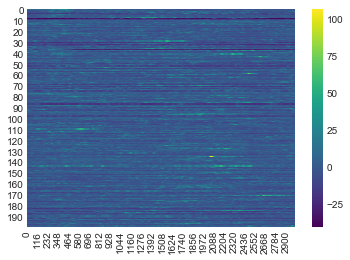

In [57]:
sns.heatmap(data_9_ephys, cmap="viridis")

In [58]:
data_9_behav.head()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome,trial.included
0,1,674.234,674.928,675.900,675.921,675.942,Gamble,Left,Win,1
1,2,676.961,677.654,679.357,679.378,679.400,Gamble,Left,Win,1
2,3,680.418,681.112,682.716,682.737,682.759,Safebet,Left,WouldHaveWon,1
3,4,683.778,684.471,685.378,685.400,685.422,Gamble,Left,Win,1
4,5,686.440,687.134,688.746,688.767,688.789,Safebet,Right,WouldHaveLost,1


In [59]:
data_9_behav.outcome.value_counts()  # 74 wins & 126 others

Win              74
WouldHaveLost    68
WouldHaveWon     37
Loss             21
Name: outcome, dtype: int64

In [60]:
# Convert trials so that they are [-0.5, 1.5]s around each outcome reveal
# NB! ephys_data is buttonpress i.e. [-1, 2]s around buttonpress event!
def time_lock(ephys_data, behav_data, is_win):
    result = []
    experiment = [item for sublist in ephys_data for item in sublist]  # the measurements of the entire experiment in one list
    # should have n_trials x 3001 elements
    
    for index, row in behav_data.iterrows():
        if index == 199:  # We don't include the last trial because the indices will probably be out of range
            break
        if not is_win and row['outcome'] not in ['Loss', 'WouldHaveWon', 'WouldHaveLost']:
            continue
        elif is_win and row['outcome'] != 'Win':
            continue
            
        delay = round((row['reveal.time'] - row['buttonpress.time']) * 1000) # the time between buttonpress event and outcome reveal in ms 
        outcome_moment = index * 3001 + 1000 + delay # the buttonpress is 1s = 1000ms from the beginning of the trial
        trial = experiment[outcome_moment - 500:outcome_moment + 1500]
        result.append(trial)

    return result

In [61]:
win_trials = time_lock(data_9_ephys, data_9_behav, True)
len(win_trials)

74

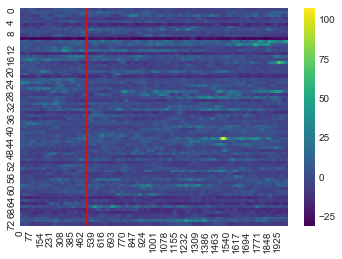

In [62]:
sns.heatmap(win_trials, cmap="viridis")
plt.axvline(500, color='r')

In [63]:
other_trials = time_lock(data_9_ephys, data_9_behav, False)
len(other_trials)

125

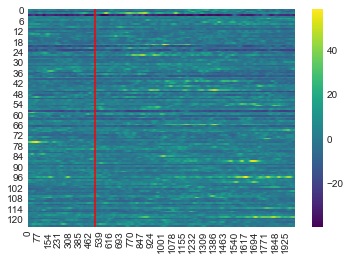

In [64]:
plt.rcParams['figure.figsize'] = [6, 4] # width x height (inch)
sns.heatmap(other_trials, cmap="viridis")
plt.axvline(500, color='r')

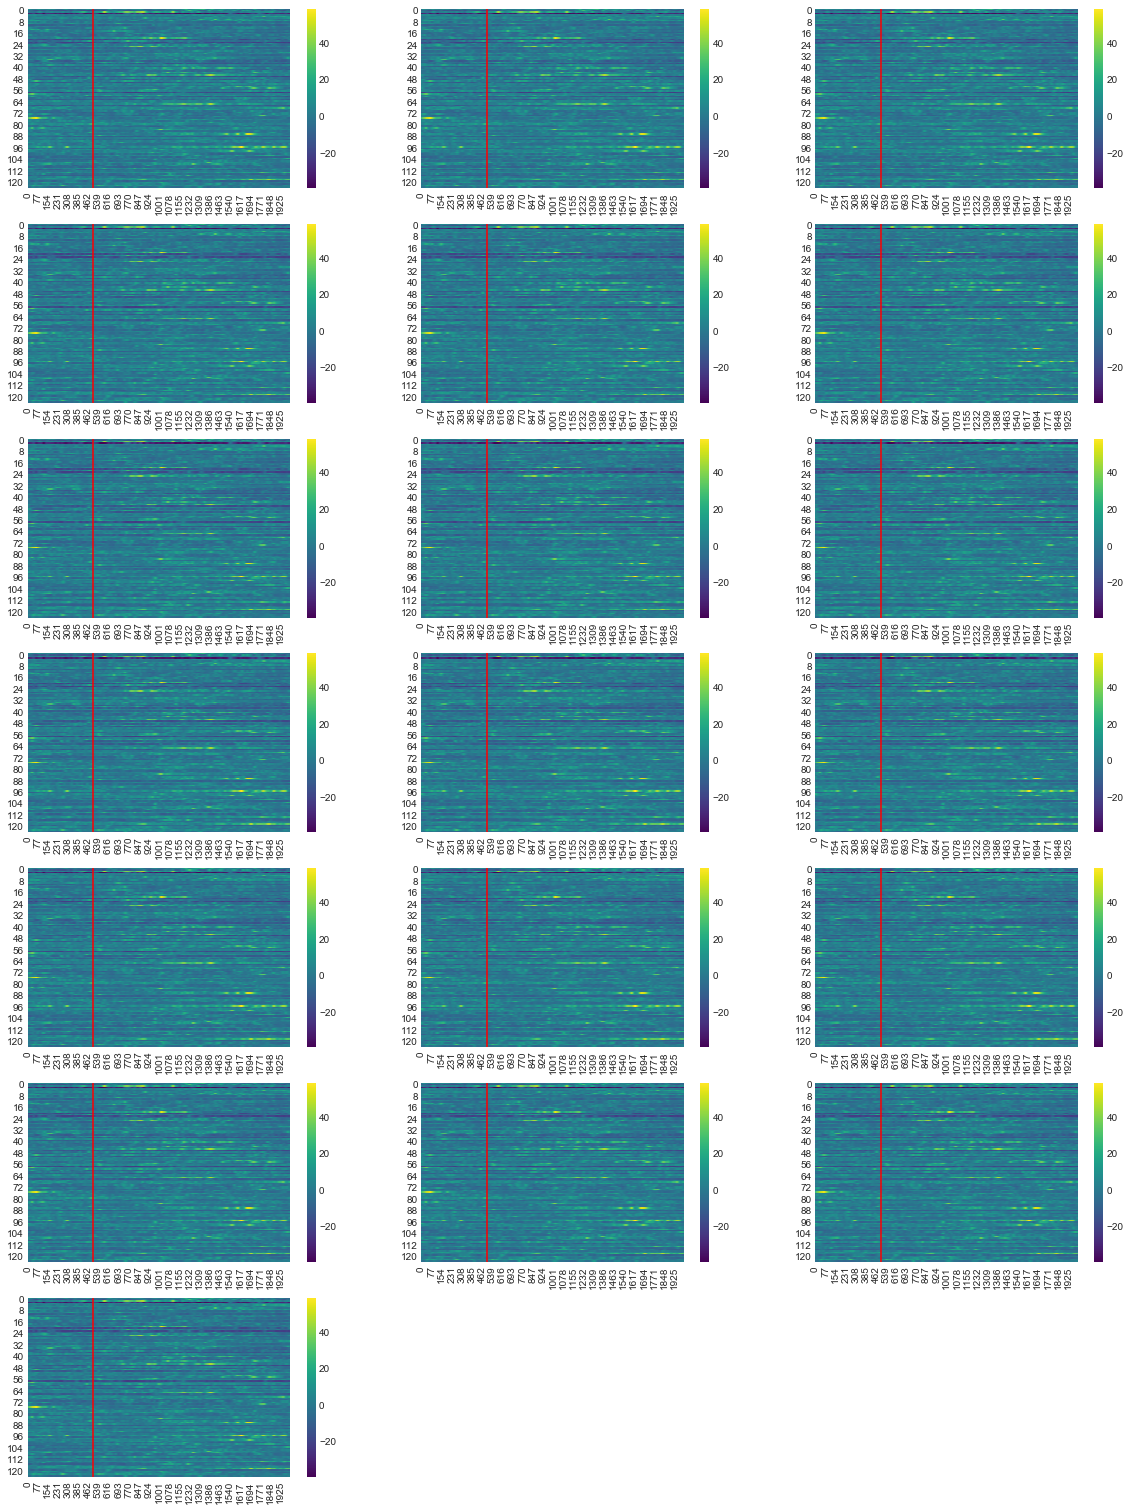

In [65]:
plt.rcParams['figure.figsize'] = [20, 27] # width x height (inch)

for i in range(1, 20):
    plt.subplot(7, 3, i)
    data_ephys = extract_electrode_data(ephys_data['s9']['buttonpress_events_hg'], i)
    win_trials_ = time_lock(data_ephys, data_9_behav, True)
    sns.heatmap(other_trials, cmap="viridis")    
    plt.axvline(500, color='r')

## 2B

To create the plot, we need to take the average of the trials of one electrode and plot it along with SEM (standard error of the mean) error bands. 

In [66]:
win_trials = np.matrix(win_trials)
win_trials.shape

(74, 2000)

In [67]:
sem_win = stats.sem(win_trials)
sem_win.shape

(2000,)

In [68]:
mean_wins = np.array(win_trials.mean(0))[0]
mean_wins.shape

(2000,)

In [69]:
other_trials = np.matrix(other_trials)
sem_other = stats.sem(other_trials)
mean_other = np.array(other_trials.mean(0))[0]

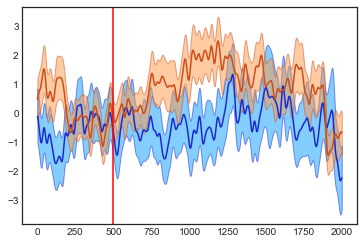

In [70]:
plt.rcParams['figure.figsize'] = [6, 4] # width x height (inch)

x = np.arange(1,2001)

plt.plot(x, mean_wins, '-k', color='#1B2ACC')
plt.fill_between(x, mean_wins-sem_win, mean_wins+sem_win,
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')

plt.plot(x, mean_other, '-k', color='#CC4F1B')
plt.fill_between(x, mean_other-sem_other, mean_other+sem_other,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

plt.axvline(500, color='r')

In [71]:
def plot_avg_with_sem(win_trials, other_trials):
    win_trials = np.matrix(win_trials)
    sem_win = stats.sem(win_trials)
    mean_wins = np.array(win_trials.mean(0))[0]
    
    other_trials = np.matrix(other_trials)
    sem_other = stats.sem(other_trials)
    mean_other = np.array(other_trials.mean(0))[0]
    
    plt.plot(x, mean_wins, '-k', color='#1B2ACC')
    plt.fill_between(x, mean_wins-sem_win, mean_wins+sem_win,
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')

    plt.plot(x, mean_other, '-k', color='#CC4F1B')
    plt.fill_between(x, mean_other-sem_other, mean_other+sem_other,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
    
    plt.axvline(500, color='r')    

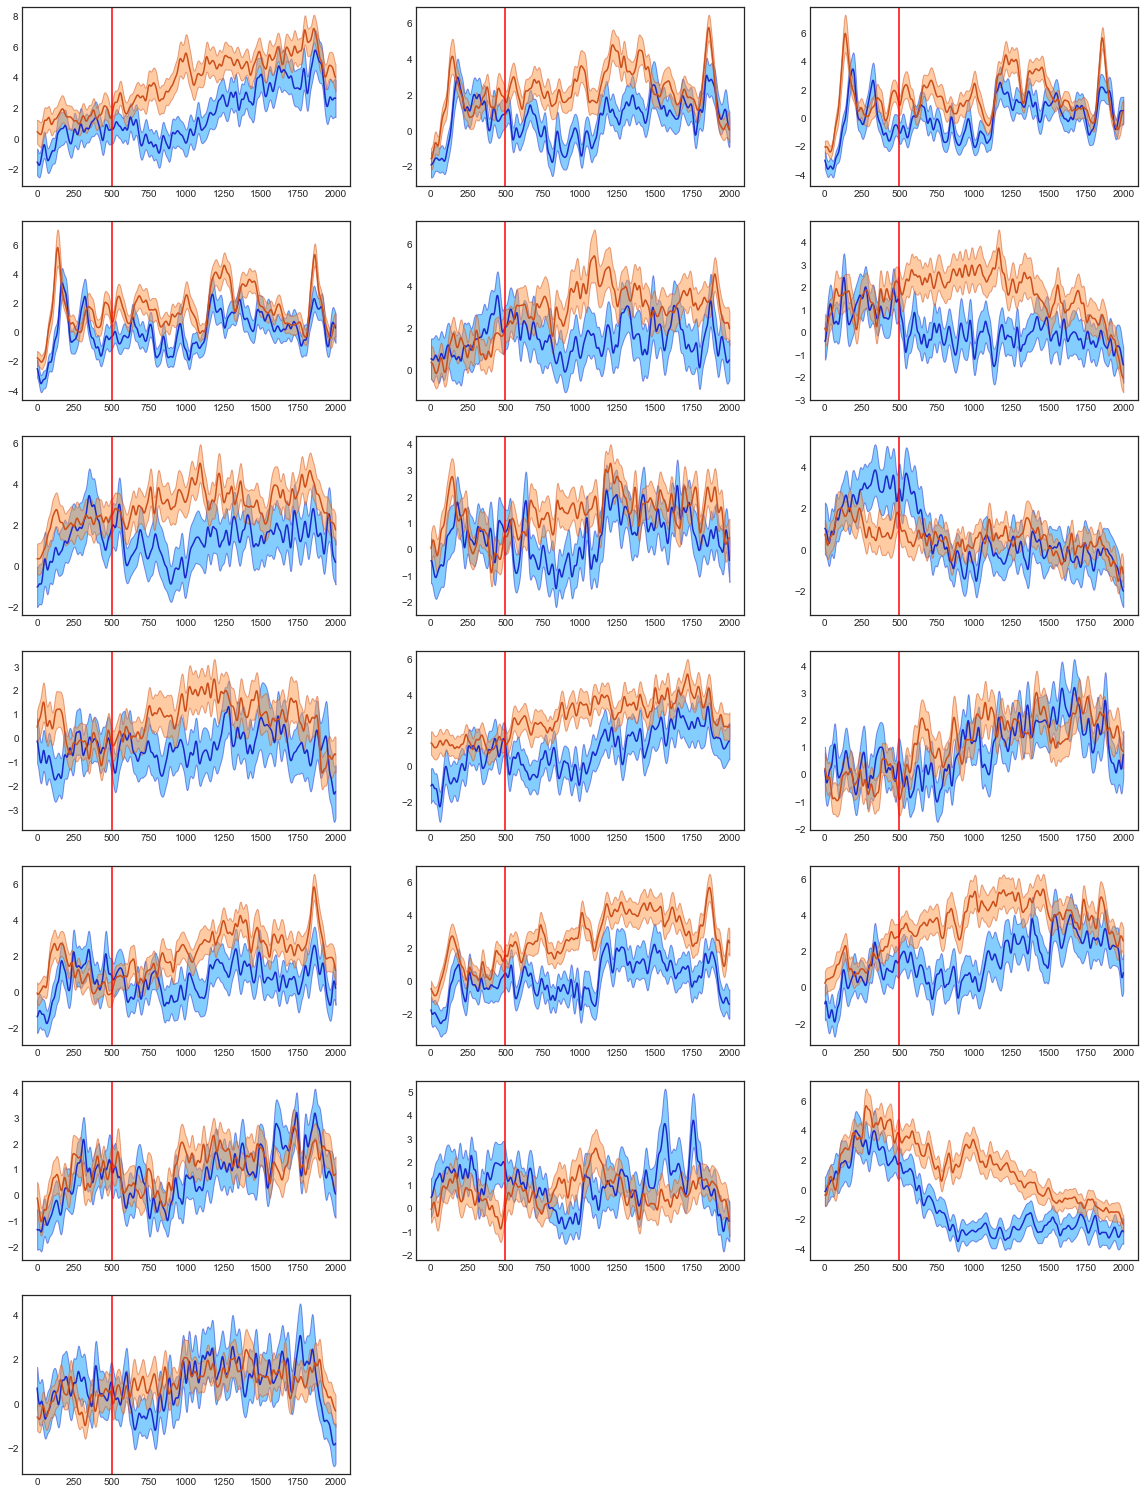

In [72]:
plt.rcParams['figure.figsize'] = [20, 27] # width x height (inch)

for i in range(1, 20):
    plt.subplot(7, 3, i)
    data_ephys = extract_electrode_data(ephys_data['s9']['buttonpress_events_hg'], i)
    win_trials_ = time_lock(data_ephys, data_9_behav, True)
    other_trials_ = time_lock(data_ephys, data_9_behav, False)
    plot_avg_with_sem(win_trials_, other_trials_)

In [73]:
# Counts how many trials contain outcome_moment + 1.5s and how many do not 
def test(behav_data):
    count_below = 0
    count_above = 0
    for index, row in behav_data.iterrows():
        delay = round((row['reveal.time'] - row['choice.time']) * 1000) # the time between game presentation and outcome reveal in ms 
        if 750 + delay + 1500 <= 3000: # outcome moment is 750 ms from the beginning
            count_below += 1
        else:
            count_above += 1
    print(count_below, count_above)
        
test(behav_data['s5'])

0 200
